# Task 1:Advance Practical Data Science
First data science problem: given a list of wine characteristics, the goal is to predict the quality of that wine.

Here, the quality of a wine is an integer value in the range of 0 (very bad) to 10 (very good). In the train data this quality is given for each wine. Your task is to predict this value for the test data.

Please follow the steps discussed in the lectures to approach the task.

1.Perform Exploratory Data Analysis (EDA) on the data.

2.Based on the EDA, build a model that predicts wine quality for the wines listed in the test set.

3.Submit your solutions to this competition website. The scoring metric is the Mean Absolute Error (MAE).

4.Prepare a presentation, containing your main findings in EDA, how you translated them to your predictive model, and an evaluation of your model. Present your results in class on November 16th.

### Program Outline
1.Wrangle Data

2.Preprocess data

3.Evaluation and analysis

4.Visualization

5.Importance of features

6.Train Model

7.Predict on Test data

### Load in Data

In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in data as a dataframe
features_train = pd.read_csv('train_data.csv')
data_test = pd.read_csv('test_data.csv')

In [2]:
#data_train.isnull().sum()
#missing values
missing_data = features_train[features_train.isnull()==True].count()
print("Overall empty data fields:",missing_data.sum())

Overall empty data fields: 0


In [3]:
features_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type', 'quality'],
      dtype='object')

In [4]:
# Descriptive statistics for each column
#features.describe()
round(features_train.describe(), 2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
count,5150.00,5150.00,5150.00,5150.00,5150.00,5150.00,5150.00,5150.00,5150.00,5150.00,5150.0,5150.00,5150.00
mean,7.22,0.34,0.32,5.44,0.06,30.63,115.71,0.99,3.22,0.53,10.5,1.75,5.82
std,1.30,0.17,0.15,4.81,0.04,18.03,56.81,0.00,0.16,0.15,1.2,0.43,0.88
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.0,1.00,3.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.5,2.00,5.00
50%,7.00,0.29,0.31,2.90,0.05,29.00,118.00,0.99,3.20,0.51,10.3,2.00,6.00
75%,7.70,0.41,0.40,8.10,0.06,42.00,156.00,1.00,3.32,0.60,11.3,2.00,6.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.9,2.00,9.00


In [5]:
features_train['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [6]:
features_train['quality'].value_counts()

6    2248
5    1678
7     872
4     173
8     149
3      26
9       4
Name: quality, dtype: int64

In [7]:
features_train['quality'].describe()

count    5150.000000
mean        5.821359
std         0.875161
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

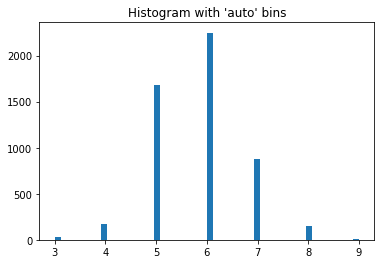

In [8]:
import matplotlib.pyplot as plt
rng = features_train['quality']
plt.hist(rng, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [9]:
#Mean quality of wine
print("red mean =",features_train["quality"].mean())
#view the head of dataset
features_train.head()

red mean = 5.821359223300971


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,5
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,6
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,5


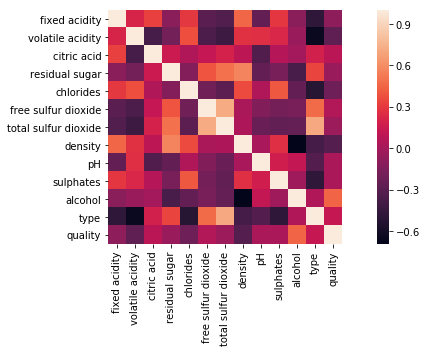

In [10]:
#Correlation of features
cmat = features_train.corr()
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(cmat,square=True)
f.tight_layout()

In [11]:
print('The shape of our features is:', features_train.shape)

The shape of our features is: (5150, 13)


### Data Preparation

In [12]:
# One Hot Encoding
features = pd.get_dummies(features_train)

# Extract features and labels
labels = features['quality']
features = features.drop('quality', axis = 1)

# List of features for later use
feature_list = list(features.columns)

# Convert to numpy arrays
import numpy as np

features = np.array(features)
labels = np.array(labels)

# Training and Testing Sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.01, random_state = 42)

In [13]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (5098, 12)
Training Labels Shape: (5098,)
Testing Features Shape: (52, 12)
Testing Labels Shape: (52,)


## 4)Visualization

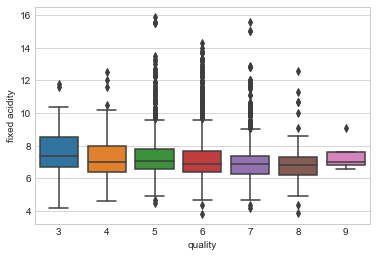

In [14]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
#https://seaborn.pydata.org/tutorial/axis_grids.html#plotting-small-multiples-of-data-subsets
import seaborn as sns
#data_train['fixed acidity'] = np.log10(data_train['fixed acidity'])
sns.set_style("whitegrid")
ax = sns.boxplot(x="quality", y="fixed acidity", data=features_train)

In [ ]:
#data_train['volatile acidity'] = np.log10(data_train['volatile acidity'])
ax = sns.boxplot(x="quality", y="volatile acidity", data=features_train)

In [ ]:
#data_train['total sulfur dioxide'] = np.log10(data_train['total sulfur dioxide'])
ax = sns.boxplot(x="quality", y="total sulfur dioxide", data=features_train)

In [ ]:
#data_train['pH'] = np.log10(data_train['pH'])
ax = sns.boxplot(x="quality", y="pH", data=features_train)

In [ ]:
#data_train['alcohol'] = np.log10(data_train['alcohol'])
ax = sns.boxplot(x="quality", y="alcohol", data=features_train)

In [ ]:
g = sns.pairplot(features_train,vars=["quality","alcohol","volatile acidity","free sulfur dioxide"], hue="quality", palette="Set2", diag_kind="kde", size=2.5)

C:\Users\makkh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\makkh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\makkh\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


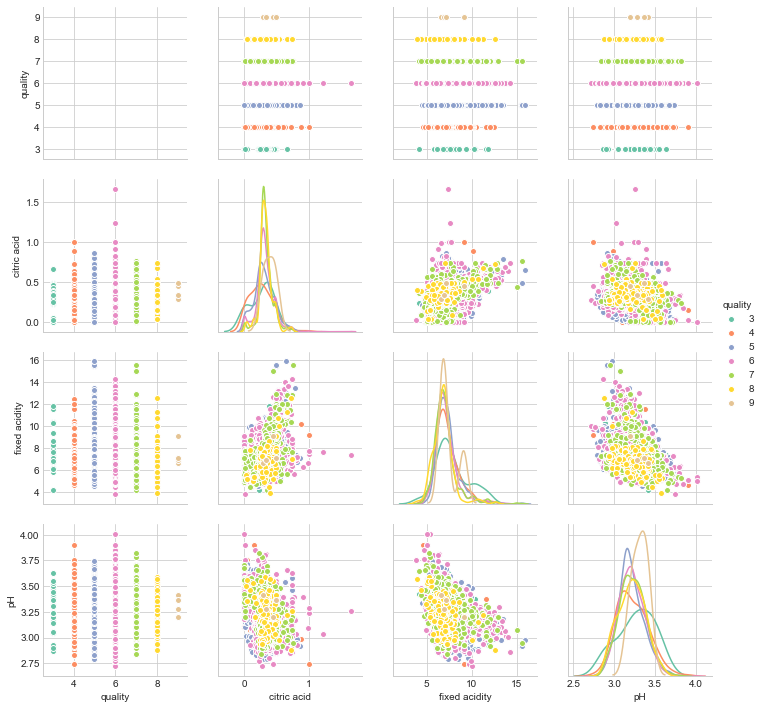

In [15]:
g = sns.pairplot(features_train,vars=["quality","citric acid","fixed acidity","pH"], hue="quality", palette="Set2", diag_kind="kde", size=2.5)

## 5)Feature Engineering

#### Importance of features

In [16]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rfr = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rfr.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [17]:
# Get numerical feature importances
importances = list(rfr.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: alcohol              Importance: 0.26
Variable: volatile acidity     Importance: 0.13
Variable: free sulfur dioxide  Importance: 0.09
Variable: sulphates            Importance: 0.08
Variable: residual sugar       Importance: 0.07
Variable: total sulfur dioxide Importance: 0.07
Variable: pH                   Importance: 0.07
Variable: fixed acidity        Importance: 0.06
Variable: citric acid          Importance: 0.06
Variable: chlorides            Importance: 0.06
Variable: density              Importance: 0.06
Variable: type                 Importance: 0.0


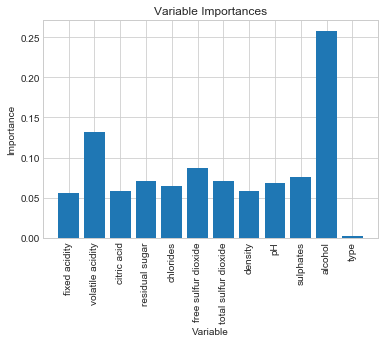

In [18]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

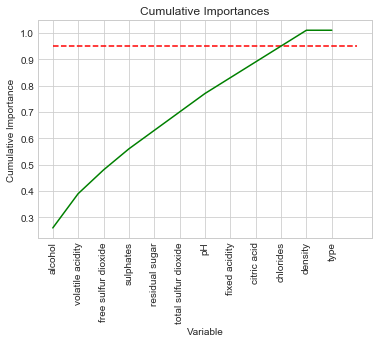

In [19]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [20]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 10


#### Restrict to the Most Important Features

In [21]:
# Names of five importances accounting for 95% of total importance
important_feature_names = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'sulphates',
 'alcohol']

# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (5098, 10)
Important test features shape: (52, 10)


In [22]:
# Use only the most important features
train_features = important_train_features[:]
test_features = important_test_features[:]

# Update feature list for visualizations
feature_list = important_feature_names[:]

## 6)Training Model

### Examine the Default Random Forest to Determine Parameters

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Random Search with Cross Validation

In [52]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [53]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 52.7min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 227.5min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=2)

In [54]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

### Evaluation Function

In [55]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

Evaluate the Default Model

In [56]:
base_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
base_model.fit(train_features, train_labels)
evaluate(base_model, test_features, test_labels)

Model Performance
Average Error: 0.4095 degrees.
Accuracy = 91.99%.


Evaluate the Best Random Search Model

In [57]:
best_random = rf_random.best_estimator_
evaluate(best_random, test_features, test_labels)

Model Performance
Average Error: 0.3564 degrees.
Accuracy = 92.98%.


### Final Model
The final model from hyperparameter tuning is as follows.

In [45]:
print('Model Parameters:\n')
pprint(best_grid_ad.get_params())
print('\n')
evaluate(best_grid_ad, test_features, test_labels)

Model Parameters:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 125,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Model Performance
Average Error: 0.4454 degrees.
Accuracy = 91.54%.


### Predict Test data

In [58]:
test_data = pd.read_csv("test_data.csv")

In [59]:
data_test = test_data[important_feature_names]
data_test.shape

(1347, 10)

In [60]:
write_test_pred = best_random.predict(data_test).round()
#write_test_pred = best_grid.predict(data_test).round()
#write_test_pred = best_grid_ad.predict(data_test).round()
write_test_pred.size

1347

In [61]:
arange = np.arange(1,write_test_pred.size+1)
arange.astype(int)
arange.size

1347

In [62]:
df = pd.DataFrame({"id" : arange, "prediction" : write_test_pred})
df.to_csv("best_random_v3_submission.csv", index=False)

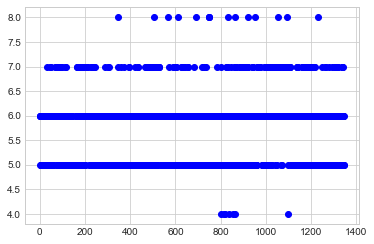

In [63]:
import matplotlib.pyplot as plt
plt.scatter(range(0,len(write_test_pred)),write_test_pred,color='blue')
plt.show()